In [1]:
from orderbook_analyzer import AnalyzeBook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
btc = AnalyzeBook('BTC')

In [3]:
# retrieve the orderbook depths for ALL options
btc_df = btc.clean_data(top_book=False)

::35.50 seconds:: >> DONEquests leftt >> 98 requests lefttt>> 466 requests leftt >> 503 requests left>> 502 requests left >> 297 requests left

In [4]:
btc_df['ratio'] = btc_df.bids_thousands / btc_df.asks_thousands 
btc_df['op_type'] = [btc_df.product_name[i].split("-")[-1] for i in range(len(btc_df))]
c = btc_df[btc_df.op_type=='C']
p = btc_df[btc_df.op_type=='P']

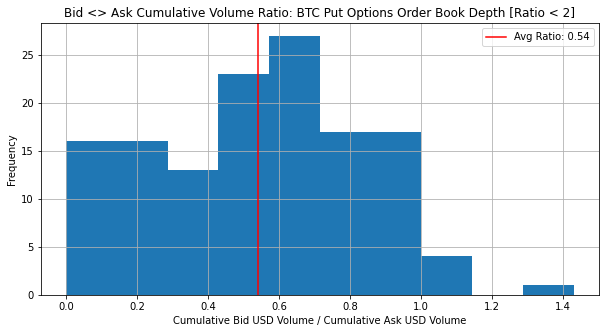

In [5]:
plt.figure(figsize=(10, 5))
subset1 = p[p.ratio < 2]
subset1.ratio.hist()
plt.axvline(subset1.ratio.mean(), c='r', label= "Avg Ratio: " + str(round(subset1.ratio.mean(), 2)))
plt.title("Bid <> Ask Cumulative Volume Ratio: BTC Put Options Order Book Depth [Ratio < 2]")
plt.xlabel('Cumulative Bid USD Volume / Cumulative Ask USD Volume')
plt.ylabel("Frequency")
plt.legend()
plt.savefig("btc_put_distribution.jpeg", dpi=500)

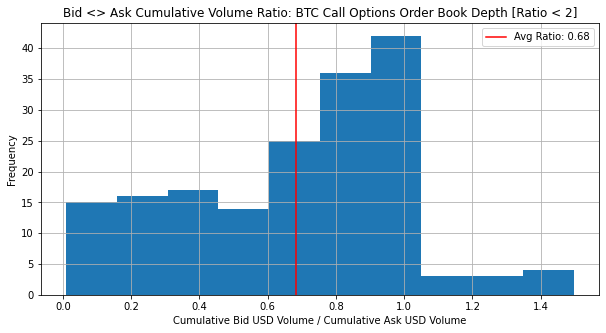

In [6]:
plt.figure(figsize=(10, 5))
subset1 = c[c.ratio < 2]
subset1.ratio.hist()
plt.axvline(subset1.ratio.mean(), c='r', label= "Avg Ratio: " + str(round(subset1.ratio.mean(), 2)))
plt.title("Bid <> Ask Cumulative Volume Ratio: BTC Call Options Order Book Depth [Ratio < 2]")
plt.xlabel('Cumulative Bid USD Volume / Cumulative Ask USD Volume')
plt.ylabel("Frequency")
plt.legend()
plt.savefig("btc_call_distribution.jpeg", dpi=500)

In [7]:
subset2 = btc_df[btc_df.ratio >= 2]
subset2.sort_values("ratio", ascending=False).reset_index(drop=True)

,product_name,bids_thousands,asks_thousands,ratio,op_type
0,BTC-30JUN23-20000-C,681.279613,210.308586,3.239428,C


In [8]:
top_bid = btc_df.sort_values('bids_thousands', ascending=False).head(5).reset_index(drop=True)
top_ask = btc_df.sort_values('asks_thousands', ascending=False).head(5).reset_index(drop=True)

In [9]:
top_bid

,product_name,bids_thousands,asks_thousands,ratio,op_type
0,BTC-30JUN23-20000-C,681.279613,210.308586,3.239428,C
1,BTC-29SEP23-5000-C,215.923469,219.130975,0.985363,C
2,BTC-30JUN23-5000-C,214.204256,217.960693,0.982766,C
3,BTC-31MAR23-5000-C,213.207094,216.525605,0.984674,C
4,BTC-31MAR23-19000-P,173.021952,120.938122,1.430665,P


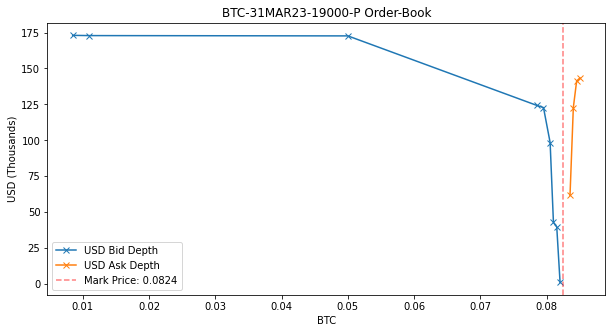

In [10]:
btc.plot_book("BTC-31MAR23-19000-P", savefig=True)

In [11]:
top_ask

,product_name,bids_thousands,asks_thousands,ratio,op_type
0,BTC-27JAN23-22000-C,24.832602,548.780112,0.045251,C
1,BTC-20JAN23-21000-C,17.086319,456.568076,0.037423,C
2,BTC-29DEC23-12000-P,24.442814,427.218724,0.057214,P
3,BTC-31MAR23-16000-P,65.340371,414.543129,0.157620,P
4,BTC-29SEP23-10000-P,14.570825,354.193218,0.041138,P


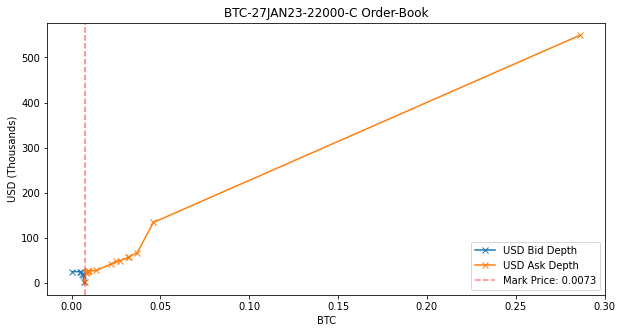

In [12]:
btc.plot_book("BTC-27JAN23-22000-C", savefig=True)

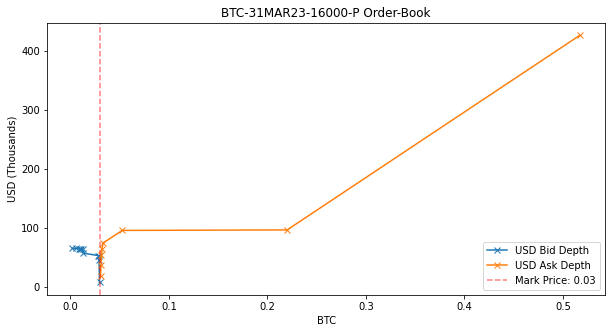

In [13]:
btc.plot_book("BTC-31MAR23-16000-P", savefig=True)